In [52]:
import pandas as pd

In [53]:
dados = pd.read_csv('./clean_data.csv')
dados = dados.dropna()
dados.head(20)

,price,area,status,bhk,bathroom,age,location,builder
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd
5,188.00,2221,Under Construction,3,3.0,0.0,Virugambakkam,Traventure Homes Pvt Ltd
11,240.00,1500,Ready to move,3,3.0,1.0,Anna Nagar,Pushkar Properties Pvt Ltd
15,113.00,2343,Ready to move,4,4.0,5.0,Navallur,Olympia Group
28,50.76,1045,Ready to move,2,2.0,1.0,Chromepet,Doshi Housing
30,57.50,920,Under Construction,2,1.0,0.0,Ambattur,vinoth builders
43,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers
44,50.21,1152,Ready to move,2,3.0,1.0,Padur,Pacifica Companies
47,47.04,920,Under Construction,2,2.0,0.0,Perumbakkam,Saradeuz Realty Constructions


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

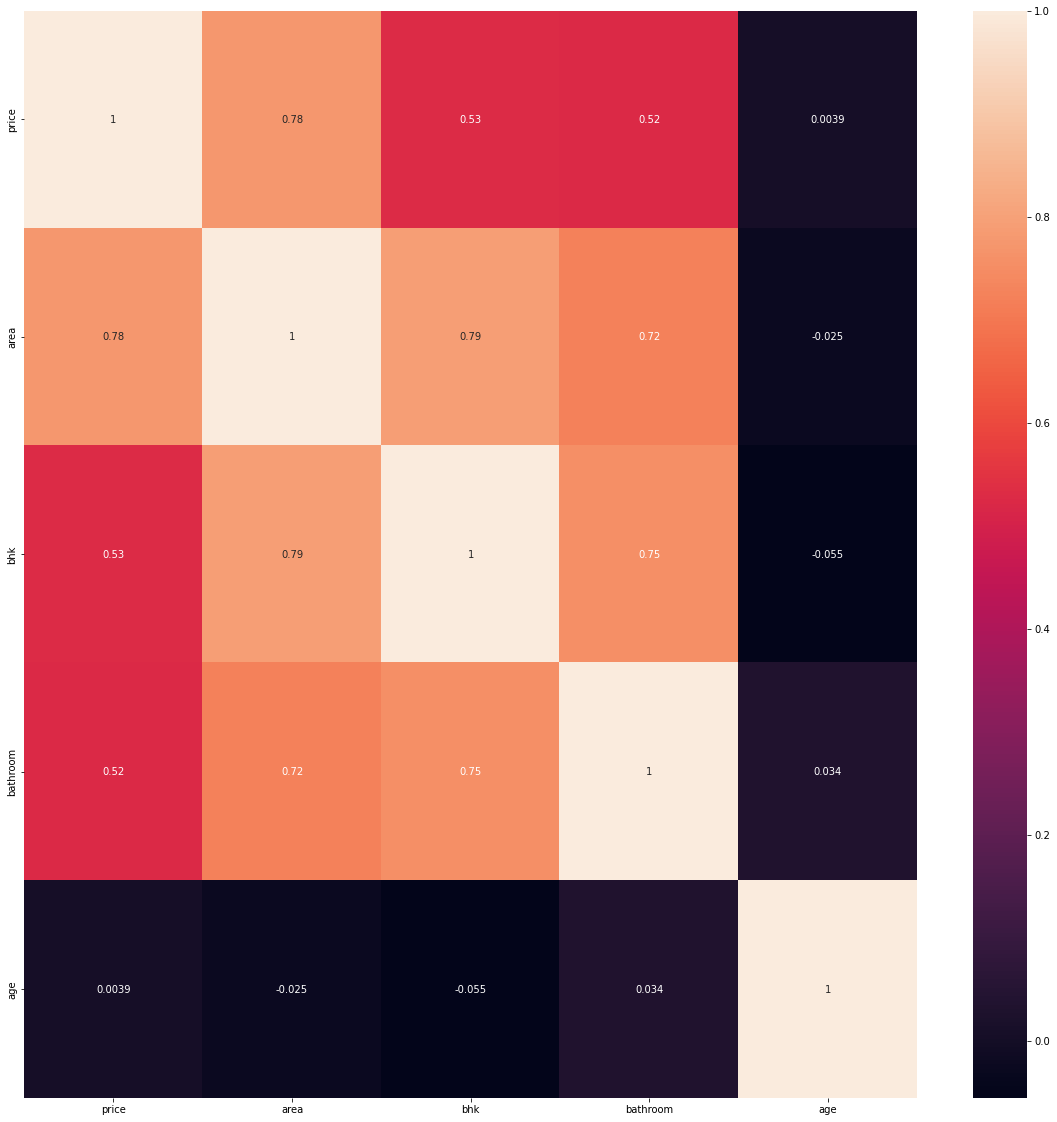

In [54]:
figura = plt.figure(figsize=(20,20))
sns.heatmap(dados.corr(), annot=True)

In [56]:
X_dados = dados.iloc[:,1:8]
X_dados

,area,status,bhk,bathroom,age,location,builder
3,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd
5,2221,Under Construction,3,3.0,0.0,Virugambakkam,Traventure Homes Pvt Ltd
11,1500,Ready to move,3,3.0,1.0,Anna Nagar,Pushkar Properties Pvt Ltd
15,2343,Ready to move,4,4.0,5.0,Navallur,Olympia Group
...,...,...,...,...,...,...,...
2615,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2616,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2617,800,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2618,850,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties


In [57]:
y_dados = dados.iloc[:,0:1]
y_dados

,price
3,49.00
4,42.28
5,188.00
11,240.00
15,113.00
...,...
2615,27.50
2616,27.50
2617,30.00
2618,31.50


In [58]:
from sklearn import preprocessing

In [59]:
LE = preprocessing.LabelEncoder()

In [60]:
X_dados['status'] = LE.fit_transform(X_dados['status'])

In [61]:
X_dados['location'] = LE.fit_transform(X_dados['location'])
X_dados['builder'] = LE.fit_transform(X_dados['builder'])

In [62]:
X_dados

,area,status,bhk,bathroom,age,location,builder
3,1028,0,2,2.0,3.0,3,16
4,588,1,2,1.0,0.0,56,48
5,2221,1,3,3.0,0.0,102,54
11,1500,0,3,3.0,1.0,4,45
15,2343,0,4,4.0,5.0,48,37
...,...,...,...,...,...,...,...
2615,750,0,2,2.0,3.0,101,56
2616,750,0,2,2.0,3.0,101,56
2617,800,0,2,2.0,3.0,101,56
2618,850,0,2,2.0,3.0,101,56


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_dados_treinamento, X_dados_teste, y_dados_treinamento, y_dados_teste = train_test_split(X_dados, y_dados, test_size = 0.3, random_state = 0)

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_dados_treinamento, y_dados_treinamento)

LinearRegression()

In [66]:
previsoes = regressor.predict(X_dados_teste)

In [67]:
regressor.score(X_dados_teste,y_dados_teste)

0.6292010471895431

In [68]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_dados_teste, previsoes)

29.460335749117167